## 데이터셋 다운 및 압축 풀기

In [ ]:
import os
import gdown
import zipfile

# 다운로드할 파일들의 URL
urls = {
    "train": "https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M",
    "valid": "https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q",
    "test": "https://drive.google.com/uc?id=1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T"
}

# 데이터 저장 경로
data_dir = "/home/20203068/WIDER_FACE"
os.makedirs(data_dir, exist_ok=True)

for split, url in urls.items():
    zip_path = os.path.join(data_dir, f"{split}.zip")
    extract_path = os.path.join(data_dir, split)

    gdown.download(url, zip_path, quiet=False)

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)




Downloading...
From (original): https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
From (redirected): https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&confirm=t&uuid=e29d7998-7850-4a9b-bcf9-1e2cf0f375b4
To: /home/20203068/WIDER_FACE/train.zip
100%|██████████| 1.47G/1.47G [06:55<00:00, 3.53MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
From (redirected): https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q&confirm=t&uuid=809aef1b-3a62-4e04-a12c-0d9abb306a4c
To: /home/20203068/WIDER_FACE/valid.zip
100%|██████████| 363M/363M [01:41<00:00, 3.59MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T
From (redirected): https://drive.google.com/uc?id=1HIfDbVEWKmsYKJZm4lchTBDLW5N7dY5T&confirm=t&uuid=867aff2d-d464-4f17-a7cd-eddf2aa4ceb1
To: /home/20203068/WIDER_FACE/test.zip
100%|██████████| 1.84G/1.84G [09:04<00:00, 3.38MB/s]  


In [ ]:
# 다운로드 URL
annotation_url = "http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip"

# 저장할 디렉토리 설정
data_dir = "/home/20203068/WIDER_FACE"
annotation_zip_path = os.path.join(data_dir, "wider_face_split.zip")
annotation_extract_path = os.path.join(data_dir, "wider_face_split")

# 디렉토리 생성
os.makedirs(data_dir, exist_ok=True)

# wget을 이용한 다운로드
!wget -O {annotation_zip_path} {annotation_url}

# 압축 해제
with zipfile.ZipFile(annotation_zip_path, "r") as zip_ref:
    zip_ref.extractall(annotation_extract_path)


--2025-03-01 02:08:02--  http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
192.30.252.153, 192.30.252.154oyang1213.me)... 
connected. to shuoyang1213.me (shuoyang1213.me)|192.30.252.153|:80... 
200 OKequest sent, awaiting response... 
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘/home/20203068/WIDER_FACE/wider_face_split.zip’

/home/20203068/WIDE 100%[===================>]   3.42M   809KB/s    in 5.2s    

2025-03-01 02:08:07 (676 KB/s) - ‘/home/20203068/WIDER_FACE/wider_face_split.zip’ saved [3591642/3591642]



## 데이터셋 모델 학습에 맞게 YOLO 포맷으로 변환

 바운딩 박스 변환
  - x_min, y_min, width, height -> class_id, x_center, y_center, width, height

- class_id: 객체의 클래스 번호 (face는 1종류이므로 항상 0으로 지정)
- x_center, y_center: 바운딩 박스 중심 좌표
- width, height: 바운딩 박스 크기 (이미지 크기에 대한 비율값)

yolo 데이터셋 구조
dataset/

├── train/

│   ├── images/  (훈련 이미지)

│   ├── labels/  (훈련 라벨)

├── valid/

│   ├── images/  (검증 이미지)

│   ├── labels/  (검증 라벨)

└── datasets.yaml  (데이터 정보 파일)

- images 폴더에는 학습과 검증에 사용할 이미지 파일을 저장
- labels 폴더에는 각 이미지에 대한 라벨 파일을 저장
- 라벨 파일은 YOLO 포맷으로 작성되며, 각 줄에 이미지에 있는 객체의 바운딩 박스
정보가 담긴다.


yaml 파일 구조

  path: /home/20203068/WIDER_FACE

  train: train/images

  val: valid/images

  names:
   0: face



In [ ]:
import os
import cv2

# YOLO 데이터 경로 설정
data_dir = "/home/20203068/WIDER_FACE"
train_images_path = os.path.join(data_dir, "train/WIDER_train/images")
valid_images_path = os.path.join(data_dir, "valid/WIDER_val/images")

# YOLO 형식으로 저장할 경로
yolo_train_images_path = os.path.join(data_dir, "train/images")
yolo_train_labels_path = os.path.join(data_dir, "train/labels")
yolo_valid_images_path = os.path.join(data_dir, "valid/images")
yolo_valid_labels_path = os.path.join(data_dir, "valid/labels")

# 디렉토리 생성
os.makedirs(yolo_train_images_path, exist_ok=True)
os.makedirs(yolo_train_labels_path, exist_ok=True)
os.makedirs(yolo_valid_images_path, exist_ok=True)
os.makedirs(yolo_valid_labels_path, exist_ok=True)

def convert_to_yolo_format(image_width, image_height, x, y, w, h):
    # 바운딩 박스를 YOLO 형식으로 변환 (비율 기준)
    x_center = (x + w / 2) / image_width
    y_center = (y + h / 2) / image_height
    w = w / image_width
    h = h / image_height
    return f"0 {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n"  # class_id는 0지정

def convert_annotations_to_yolo(annotation_file, images_path, output_images_path, output_labels_path):
    # WIDER FACE 바운딩 박스를 YOLO 포맷으로 변환하여 저장
    with open(annotation_file, "r") as f:
        lines = f.readlines()

    image_count = 0
    for idx, line in enumerate(lines):
        # 이미지 파일 경로가 있는 줄 찾기
        if ".jpg" in line:
            img_name = line.strip()
            img_path = os.path.join(images_path, img_name)

            # 이미지 존재 여부 확인
            if not os.path.exists(img_path):
                continue

            # 이미지 로드
            img = cv2.imread(img_path)
            if img is None:
                continue

            img_height, img_width, _ = img.shape

            # 얼굴 개수 읽기
            try:
                num_faces = int(lines[idx + 1].strip())
            except ValueError:
                continue

            # 바운딩 박스 정보 추출
            bbox_lines = lines[idx + 2: idx + 2 + num_faces]
            yolo_annotations = []

            for bbox in bbox_lines:
                parts = bbox.strip().split()
                if len(parts) < 4:
                    continue

                x, y, w, h = map(int, parts[:4])
                yolo_annotations.append(convert_to_yolo_format(img_width, img_height, x, y, w, h))

            # YOLO 포맷 이미지 저장 경로
            save_img_name = f"wider_{image_count}.jpg"
            save_txt_name = f"wider_{image_count}.txt"

            # YOLO 학습 폴더에 저장
            cv2.imwrite(os.path.join(output_images_path, save_img_name), img)

            # YOLO 라벨 저장
            with open(os.path.join(output_labels_path, save_txt_name), "w") as f:
                f.writelines(yolo_annotations)

            image_count += 1


# WIDER FACE annotation 파일 경로
train_annotation_path = os.path.join(data_dir, "wider_face_split/wider_face_split/wider_face_train_bbx_gt.txt")
valid_annotation_path = os.path.join(data_dir, "wider_face_split/wider_face_split/wider_face_val_bbx_gt.txt")

# YOLO 포맷 변환 실행
convert_annotations_to_yolo(train_annotation_path, train_images_path, yolo_train_images_path, yolo_train_labels_path)
convert_annotations_to_yolo(valid_annotation_path, valid_images_path, yolo_valid_images_path, yolo_valid_labels_path)


# YAML 파일 생성
yaml_content = f"""path: {data_dir}
train: train/images
val: valid/images

# 클래스 정보
names:
  0: face
"""

yaml_path = os.path.join(data_dir, "datasets")
with open(yaml_path, "w") as f:
    f.write(yaml_content)



## 모델 학습

In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 로드
model = YOLO("yolov8n.pt")

#학습
model.train(
    data="/home/20203068/WIDER_FACE/datasets.yaml",
    epochs=20,
    batch=16,
    imgsz=640,
    device="cuda",
)


New https://pypi.org/project/ultralytics/8.3.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/20203068/WIDER_FACE/datasets.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /home/20203068/WIDER_FACE/train/labels.cache... 12880 images, 4 backgrounds, 1 corrupt: 100%|██████████| 12880/12880 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/20203068/WIDER_FACE/train/images/wider_10969.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0254]
train: WARNING ⚠️ /home/20203068/WIDER_FACE/train/images/wider_12381.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/20203068/WIDER_FACE/train/images/wider_3232.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/20203068/WIDER_FACE/train/images/wider_7207.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/gatoai/python/venv/3.10/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/20203068/WIDER_FACE/valid/labels.cache... 3226 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3226/3226 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/20203068/WIDER_FACE/valid/images/wider_1060.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/20203068/WIDER_FACE/valid/images/wider_1885.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/03/01 12:21:39 INFO mlflow.bedrock: Enabled auto-tracing for Bedrock. Note that MLflow can only trace boto3 service clients that are created after this call. If you have already created one, please recreate the client by calling `boto3.client`.
2025/03/01 12:21:39 INFO mlflow.tracking.fluent: Autologging successfully enabled for boto3.
2025/03/01 12:21:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(ce8c49a3a70a47669ccf353f7f0ae56e) to http://127.0.0.1:5000
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs/detect/train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.17G      1.856      1.418      1.137        381        640: 100%|██████████| 805/805 [08:59<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [01:06<00:00,  1.52it/s]


                   all       3225      39675      0.748      0.439      0.501       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.38G      1.712      1.055      1.074        795        640: 100%|██████████| 805/805 [13:09<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:59<00:00,  1.70it/s]


                   all       3225      39675      0.727      0.422      0.469      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.07G       1.72      1.036      1.072        503        640:   6%|▌         | 46/805 [00:33<08:30,  1.49it/s]

       3/20      7.19G      1.684      1.022      1.066        382        640: 100%|██████████| 805/805 [22:10<00:00,  1.65s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [04:32<00:00,  2.70s/it]


                   all       3225      39675      0.775      0.457      0.536      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.24G      1.634     0.9649       1.05        488        640: 100%|██████████| 805/805 [07:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:46<00:00,  2.18it/s]


                   all       3225      39675      0.766      0.473       0.54      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.96G      1.608     0.9304      1.043        287        640: 100%|██████████| 805/805 [05:45<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:48<00:00,  2.09it/s]


                   all       3225      39675      0.778      0.485      0.553       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.03G      1.577     0.8956      1.038        217        640: 100%|██████████| 805/805 [05:55<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:46<00:00,  2.18it/s]


                   all       3225      39675      0.789      0.489      0.563      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       9.8G      1.562     0.8687      1.026        239        640: 100%|██████████| 805/805 [05:52<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.11it/s]


                   all       3225      39675      0.799      0.504      0.578      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.59G      1.545     0.8536      1.021        196        640: 100%|██████████| 805/805 [05:51<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.12it/s]


                   all       3225      39675      0.805      0.516      0.593      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.2G      1.529     0.8363      1.019        102        640: 100%|██████████| 805/805 [05:50<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.14it/s]


                   all       3225      39675      0.804      0.517      0.593      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.43G      1.516     0.8198      1.016        143        640: 100%|██████████| 805/805 [05:49<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:46<00:00,  2.16it/s]


                   all       3225      39675      0.807      0.526      0.598      0.319
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      10.2G      1.482     0.7895      1.016        154        640: 100%|██████████| 805/805 [05:37<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.11it/s]


                   all       3225      39675      0.806      0.524      0.598      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       9.6G      1.473      0.777      1.012        317        640: 100%|██████████| 805/805 [05:33<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:50<00:00,  2.01it/s]


                   all       3225      39675      0.809      0.529      0.607      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       8.6G      1.451      0.755      1.006         86        640:  57%|█████▋    | 460/805 [03:11<02:15,  2.55it/s]

      13/20      6.94G       1.46     0.7586      1.008         67        640: 100%|██████████| 805/805 [13:50<00:00,  1.03s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [04:07<00:00,  2.45s/it]


                   all       3225      39675      0.816      0.533      0.609      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.49G      1.457     0.7547      1.004        102        640:  49%|████▊     | 391/805 [06:53<07:30,  1.09s/it]

      14/20      7.03G      1.453     0.7483      1.005        125        640:  67%|██████▋   | 537/805 [11:56<06:49,  1.53s/it]  

      14/20      7.04G      1.451     0.7478      1.005        117        640: 100%|██████████| 805/805 [19:53<00:00,  1.48s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [04:08<00:00,  2.46s/it]


                   all       3225      39675      0.817      0.535      0.615      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.21G       1.44     0.7355      1.001        207        640: 100%|██████████| 805/805 [15:49<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.13it/s]


                   all       3225      39675      0.816       0.54      0.616      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.57G      1.431     0.7242      0.995        171        640: 100%|██████████| 805/805 [05:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.15it/s]


                   all       3225      39675      0.817      0.542       0.62      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.66G      1.416      0.709      0.991        192        640: 100%|██████████| 805/805 [05:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:46<00:00,  2.16it/s]


                   all       3225      39675       0.82      0.545      0.622      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      10.3G      1.407     0.6999     0.9901        201        640: 100%|██████████| 805/805 [05:27<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:47<00:00,  2.12it/s]


                   all       3225      39675      0.828      0.548      0.628      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.24G      1.394     0.6869     0.9871        103        640: 100%|██████████| 805/805 [05:26<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:46<00:00,  2.16it/s]


                   all       3225      39675      0.827      0.553      0.631      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.27G      1.384      0.677     0.9835        222        640: 100%|██████████| 805/805 [05:26<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:45<00:00,  2.21it/s]


                   all       3225      39675       0.83       0.55      0.631      0.344

20 epochs completed in 3.372 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 10823MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:50<00:00,  2.00it/s]


                   all       3225      39675       0.83       0.55      0.631      0.344
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train10
🏃 View run train10 at: http://127.0.0.1:5000/#/experiments/427960150476599141/runs/ce8c49a3a70a47669ccf353f7f0ae56e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/427960150476599141
MLflow: results logged to http://127.0.0.1:5000
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f57d7d06830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## 결과 및 평가

모델이 학습중에 학습 과정에서 자동으로 생성된 중간 결과물

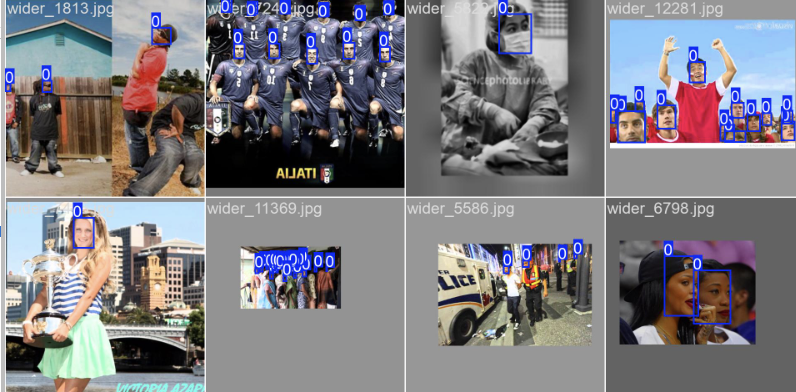

validation 이미지 detection 결과

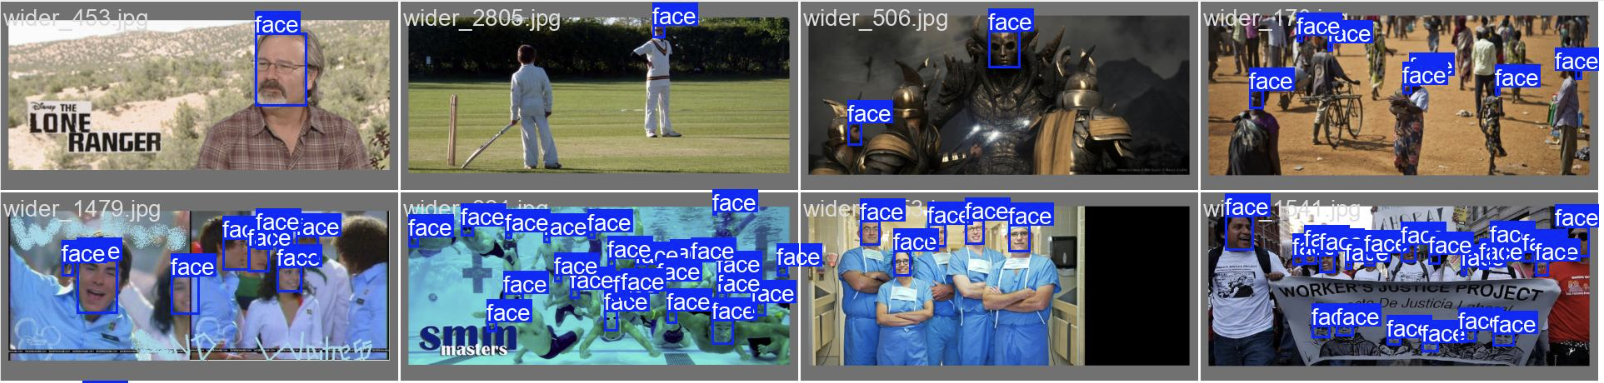

train / validation Loss

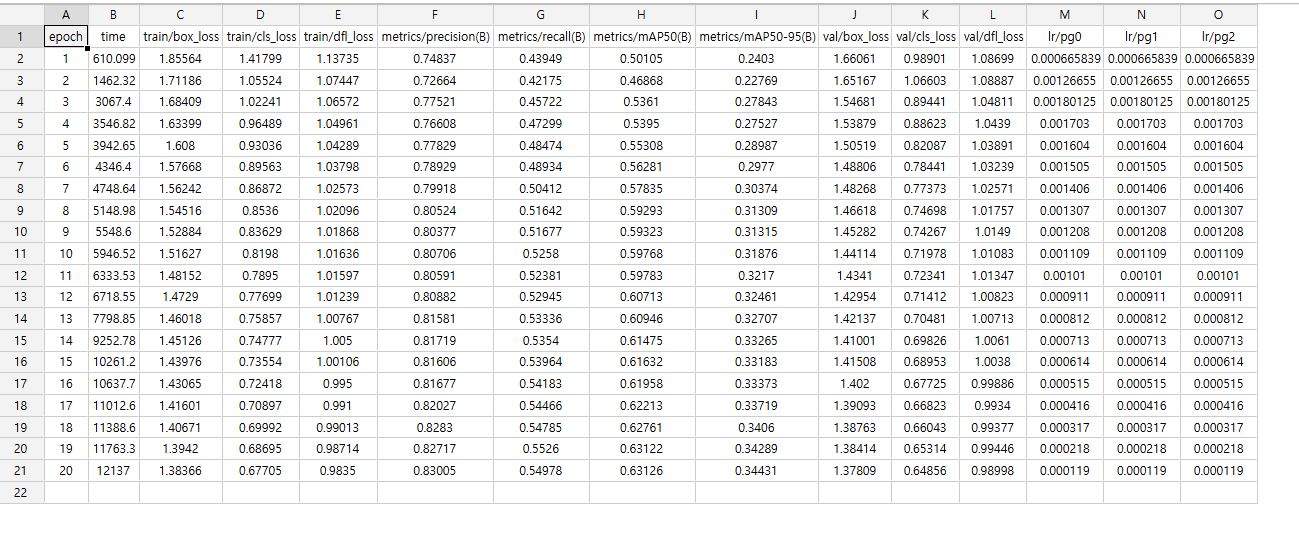

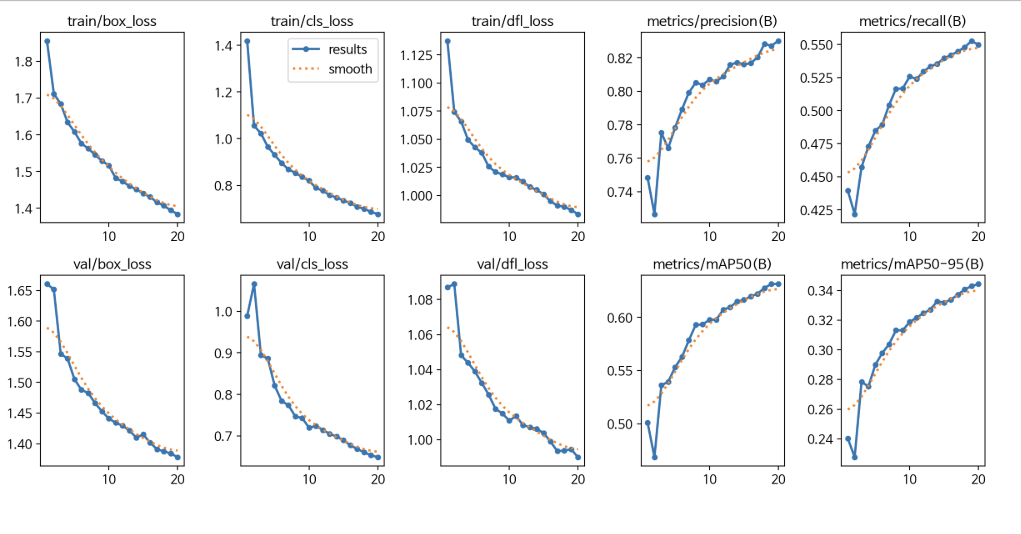

손실 값 분석
- box_loss :	바운딩 박스 위치 예측 오류
- cls_loss :	클래스 분류 오류
- dfl_loss : Distance-IoU 기반 바운딩 박스 품질 평가 오류

모든 손실 값이 epoch이 증가할수록 꾸준히 감소함.

20 epoch 기준으로 train/val 데이터 모두에서 손실 값이 안정화되는 경향을 보이며, 과적합 없이 정상적인 학습이 이루어졌음을 확인할 수 있음.

성능 지표 분석
- precision :	모델이 예측한 바운딩 박스 중 정답인 비율 (정확도)
- recall :	실제 객체(얼굴) 중 모델이 맞게 탐지한 비율 (재현율)
- mAP50  :	  0.5 기준 평균 정밀도
- mAP50-95 :	IoU 0.5~0.95 범위의 평균 정밀도

precision(정확도) : 0.748 → 0.830으로 지속적인 상승

recall(재현율) : 0.439 → 0.549로 향상

mAP50 : 0.501 → 0.631로 증가

mAP50-95 : 0.240 → 0.344로 상승



## 어려웠던 점
- WIDER FACE 데이터셋은 기본적으로 이미지 내 얼굴 위치를 (x, y, w, h) 형식으로 제공하지만 , 욜로에서 학습시킬 때 바운딩 박스를 상대 좌표 비율 기반의 (x_center, y_center, w, h) 형식으로 변환해줘야 했다
- 그래서 이미지 크기를 기준으로 좌표를 비율화하고, 박스 중심 좌표로 계산하는 로직을 구현할 때 어려움이 있었다.

- yolo 학습에서 사용하는 datasets.yaml 파일에 데이터 경로를 설정할때 처음에 코랩 환경에서 데이터셋을 처음에 구현했어서 dlpc 서버에서 학습을 진행할때 경로가 달라지는 문제가 생겨서 데이터를 불러오지 못하는 문제가 자주 발생했었다.